<center>
<h1>COMP4680/8650: Advanced Topics in Machine Learning</h1>
<h2>ASE: Total Variation Denoising</h2>
Semester 2, 2023<br>
</center>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

/Applications/Anaconda/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Function Definition
$$f(x)= \frac{1}{2} * \|u-x \|_2^2 + \lambda \sum_{i=1}^{n-1}|u_{i+1} - u_i |$$

In [2]:
signal = np.array([1,2,3,1.5,4,6])
lmd = 0.1
def objective(u):
    return 0.5 * np.sum((u-signal)**2)+lmd*np.sum(np.abs(u[1:]-u[:-1]))


def gradient(u):
   v = np.roll(u,1); v[0]=u[0]
   w = np.roll(u,-1); w[-1]=u[-1]
   return u-signal+lmd*(np.sign(u-v)-np.sign(w-u))

In [3]:

def lineSearch(f, df, x, dx, alpha=0.3, beta=0.7):
    """
    Implements backtracking line search on function f. See B&V Algorithm 9.2.

    :param f: The function being optimized.
    :param df: Gradient of the function at x.
    :param x: Starting point for line search.
    :param dx: Direction of line search.
    :param alpha: Line search parameter for stopping criteria.
    :param beta: Line search parameter for reducing step size.
    :return: Step size t.
    """

    t = 1.0
    while f(x+t*dx) >= f(x)+alpha*t*df.T@dx:
        t *= beta

    return t

def gradient_descent(x, f, g, eps=1.0e-6, max_iters=200, alpha=0.3, beta=0.7):
    """
    :param x: Starting point in domain of f.
    :param f: The function to be optimized. Returns scalar.
    :param g: The gradient function. Returns vector in R^n.
    :param eps: Tolerance for stopping.
    :param max_iters: Maximum number of iterations for stopping.
    :param alpha: Backtracking line search parameter.
    :param beta: Backtracking line search parameter.
    :return: Optimization path (i.e., array of x's). The last point is the optimal point.
    """

    path = [x.copy()]

    for iter in range(max_iters):
        # Compute gradient
        dx = -1.0 * g(x)

        # Stopping criterion
        print("...iter {}, f(x) = {}".format(iter, f(x)))
        if np.linalg.norm(dx) <= eps:
            break

        # Line search
        t = lineSearch(f, g(x), x, dx, alpha, beta)

        # Update
        x += t * dx
        path.append(x.copy())

    return path


...iter 0, f(x) = 0.8
...iter 1, f(x) = 0.7000000000000001
...iter 2, f(x) = 0.6000000000000001
...iter 3, f(x) = 0.5
...iter 4, f(x) = 0.42999999999999994
...iter 5, f(x) = 0.4226386000000001
...iter 6, f(x) = 0.40263860000000007
...iter 7, f(x) = 0.38263860000000016
...iter 8, f(x) = 0.36263860000000014
...iter 9, f(x) = 0.3426386000000002
...iter 10, f(x) = 0.32263860000000016
...iter 11, f(x) = 0.30263860000000026
...iter 12, f(x) = 0.30000000000000043
...iter 13, f(x) = 0.2978366000000003
...iter 14, f(x) = 0.29505874200000043
...iter 15, f(x) = 0.2930346000000003
...iter 16, f(x) = 0.2901174840000004
...iter 17, f(x) = 0.28823260000000034
...iter 18, f(x) = 0.2851762260000005
...iter 19, f(x) = 0.28343060000000037
...iter 20, f(x) = 0.2802349680000005
...iter 21, f(x) = 0.2786286000000004
...iter 22, f(x) = 0.2767760874000005
...iter 23, f(x) = 0.27526720000000043
...iter 24, f(x) = 0.2733172068000005
...iter 25, f(x) = 0.2719058000000005
...iter 26, f(x) = 0.26985832620000055
..

<IPython.core.display.Javascript object>

In [4]:
gd_path = gradient_descent(signal, objective, gradient, max_iters=400)
x_star = gd_path[-1]
p_star = objective(x_star)
plt.figure()
plt.semilogy(range(len(gd_path)), [objective(x) - p_star for x in gd_path], lw=2)
plt.xlabel("$k$"); plt.ylabel(r"$f(x) - p^\star$")
plt.legend(["Gradient Descent", "Newton's Method"])
plt.show()

...iter 0, f(x) = 0.2210191735081146
...iter 1, f(x) = 0.22053608675405798
...iter 2, f(x) = 0.22031857839554486
...iter 3, f(x) = 0.2147241240061146
...iter 4, f(x) = 0.21295413862868445
...iter 5, f(x) = 0.21175771152491835
...iter 6, f(x) = 0.2101293861386845
...iter 7, f(x) = 0.2099497092625124
...iter 8, f(x) = 0.20985867666734614
...iter 9, f(x) = 0.2096648555719159
...iter 10, f(x) = 0.2095557601224589
...iter 11, f(x) = 0.20929372616934622
...iter 12, f(x) = 0.20910317613729934
...iter 13, f(x) = 0.2087384384660739
...iter 14, f(x) = 0.20871281721808677
...iter 15, f(x) = 0.20855375898137637
...iter 16, f(x) = 0.20845308331157414
...iter 17, f(x) = 0.2083619574963747
...iter 18, f(x) = 0.2083135050031818
...iter 19, f(x) = 0.20826797476872386
...iter 20, f(x) = 0.2082480279763187
...iter 21, f(x) = 0.20822009940894534
...iter 22, f(x) = 0.208196884003227
...iter 23, f(x) = 0.20818317154810276
...iter 24, f(x) = 0.20817717850514225
...iter 25, f(x) = 0.20817477411846427
...iter 

In [37]:
class TotalVariationFcn(torch.autograd.Function):
    """PyTorch autograd function for total variation denoising."""

    @staticmethod
    def forward(ctx, x, lmd):
        optimizer = optim.SGD([x], lr=0.1)
        for _ in range(100):
            optimizer.zero_grad()
            loss = objective(x, x, lmd)
            loss.backward()
            optimizer.step()
        ctx.save_for_backward(x, lmd)
        return x
    
    @staticmethod
    def backward(ctx, dLdY):
        
        x, lmd = ctx.saved_tensors
        return None

...iter 0, f(x) = 0.8
...iter 1, f(x) = 0.7000000000000001
...iter 2, f(x) = 0.6000000000000001
...iter 3, f(x) = 0.5
...iter 4, f(x) = 0.42999999999999994
...iter 5, f(x) = 0.4226386000000001
...iter 6, f(x) = 0.40263860000000007
...iter 7, f(x) = 0.38263860000000016
...iter 8, f(x) = 0.36263860000000014
...iter 9, f(x) = 0.3426386000000002
...iter 10, f(x) = 0.32263860000000016
...iter 11, f(x) = 0.30263860000000026
...iter 12, f(x) = 0.30000000000000043
...iter 13, f(x) = 0.2978366000000003
...iter 14, f(x) = 0.29505874200000043
...iter 15, f(x) = 0.2930346000000003
...iter 16, f(x) = 0.2901174840000004
...iter 17, f(x) = 0.28823260000000034
...iter 18, f(x) = 0.2851762260000005
...iter 19, f(x) = 0.28343060000000037
...iter 20, f(x) = 0.2802349680000005
...iter 21, f(x) = 0.2786286000000004
...iter 22, f(x) = 0.2767760874000005
...iter 23, f(x) = 0.27526720000000043
...iter 24, f(x) = 0.2733172068000005
...iter 25, f(x) = 0.2719058000000005
...iter 26, f(x) = 0.26985832620000055
..

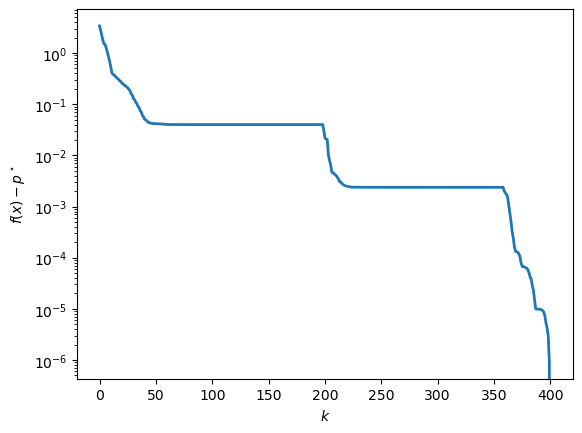

In [38]:
from torch.autograd import gradcheck

# device = torch.device("cuda")
device = torch.device("cpu")

B, M, N = 1, 10, 5
fcn = TotalVariationFcn.apply

torch.manual_seed(0)
X = torch.randn((B, M), dtype=torch.double, device=device, requires_grad=True)
Y = torch.randn((B, M), dtype=torch.double, device=device, requires_grad=True)

test = gradcheck(fcn, (X, Y, N), eps=1e-6, atol=1e-3, rtol=1e-6)
print("Backward test of DiffPolyFitFcn: {}".format(test))